## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [24]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [25]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [27]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [28]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [29]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [30]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [31]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [32]:

# view the structure of the model
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [34]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [36]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [37]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 10s 5s/step - loss: 2.6617 - accuracy: 0.3438 - val_loss: 3.5283 - val_accuracy: 0.3621
Epoch 2/50
2/2 [==============================] - 7s 4s/step - loss: 5.3150 - accuracy: 0.3906 - val_loss: 5.4185 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 7s 4s/step - loss: 3.5214 - accuracy: 0.4219 - val_loss: 1.4528 - val_accuracy: 0.5517
Epoch 4/50
2/2 [==============================] - 7s 4s/step - loss: 2.5161 - accuracy: 0.4688 - val_loss: 2.7778 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 7s 4s/step - loss: 2.3524 - accuracy: 0.4375 - val_loss: 1.3595 - val_accuracy: 0.5690
Epoch 6/50
2/2 [==============================] - 7s 4s/step - loss: 1.6937 - accuracy: 0.4844 - val_loss: 3.1681 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 7s 4s/step - loss: 1.6471 - accuracy: 0.5156 - val_

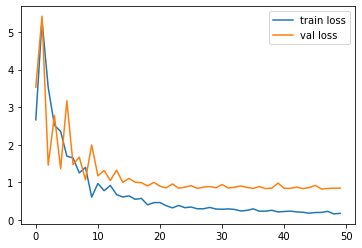

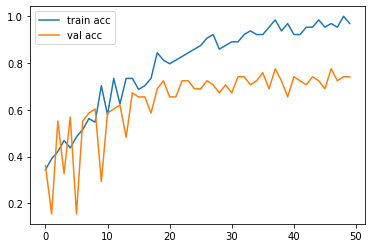

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [47]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [48]:

y_pred = model.predict(test_set)


In [49]:
y_pred

array([[2.06213854e-02, 7.76145816e-01, 2.03232765e-01],
       [6.55741096e-02, 8.25091481e-01, 1.09334350e-01],
       [2.54563391e-02, 7.38575637e-01, 2.35968068e-01],
       [8.57446343e-03, 9.75669026e-01, 1.57565102e-02],
       [3.67993444e-01, 3.60322148e-02, 5.95974326e-01],
       [2.23221093e-01, 5.32768369e-01, 2.44010568e-01],
       [8.87747183e-02, 3.82774532e-01, 5.28450787e-01],
       [7.29174197e-01, 8.69602058e-03, 2.62129843e-01],
       [2.31430829e-02, 5.37458658e-01, 4.39398259e-01],
       [1.64581743e-05, 5.29698678e-04, 9.99453843e-01],
       [6.01721331e-06, 9.29037167e-04, 9.99064982e-01],
       [7.65555818e-03, 5.82923770e-01, 4.09420580e-01],
       [2.30837286e-01, 5.89366436e-01, 1.79796293e-01],
       [3.23271602e-01, 6.40545905e-01, 3.61825861e-02],
       [5.06675281e-02, 3.54757398e-01, 5.94574988e-01],
       [6.98703434e-03, 3.15507352e-01, 6.77505672e-01],
       [1.15671111e-02, 9.18471515e-01, 6.99613914e-02],
       [5.64477891e-02, 1.74790

In [50]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [51]:
y_pred

array([1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

In [52]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [53]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [54]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [56]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[0.001529  , 0.00716536, 0.99130565]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

In [62]:
a==1

array([False])